In [0]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import io
from google.colab import files
uploaded = files.upload()

Saving bidmc_01_Breaths.csv.txt to bidmc_01_Breaths.csv.txt
Saving bidmc_01_Numerics.csv.txt to bidmc_01_Numerics.csv.txt
Saving bidmc_01_Signals.csv.txt to bidmc_01_Signals.csv.txt


##Introduction

Variables:

Signals: RESP; PLETH; V; AVR; II

Numerics: HR; PULSE; RESP; SpO2

We'll use the first patient as a base to explore and understand the data. 

Breaths.csv: Manual breath annotations

Signals.csv: Physiological signals

Numerics.csv: Physiological parameters


##Patient 1 Test

Age: 88

Gender: M

Seaborn's pairplots lets us compare every variable to each other and view a single variables distribution at the same time. It will be useful in investigating the nature and general shape of the data. 

As you can see below, there are some basic insights we can garner, such as the mean pulse and steady heartrate (a good sign for some at the age of 88).







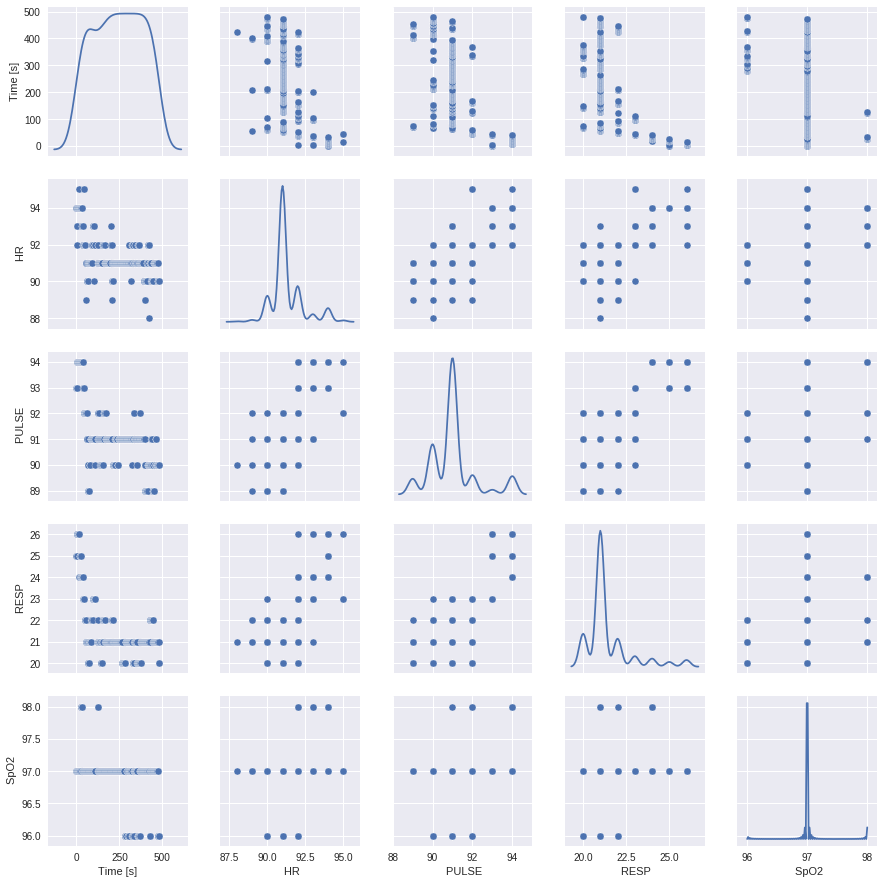

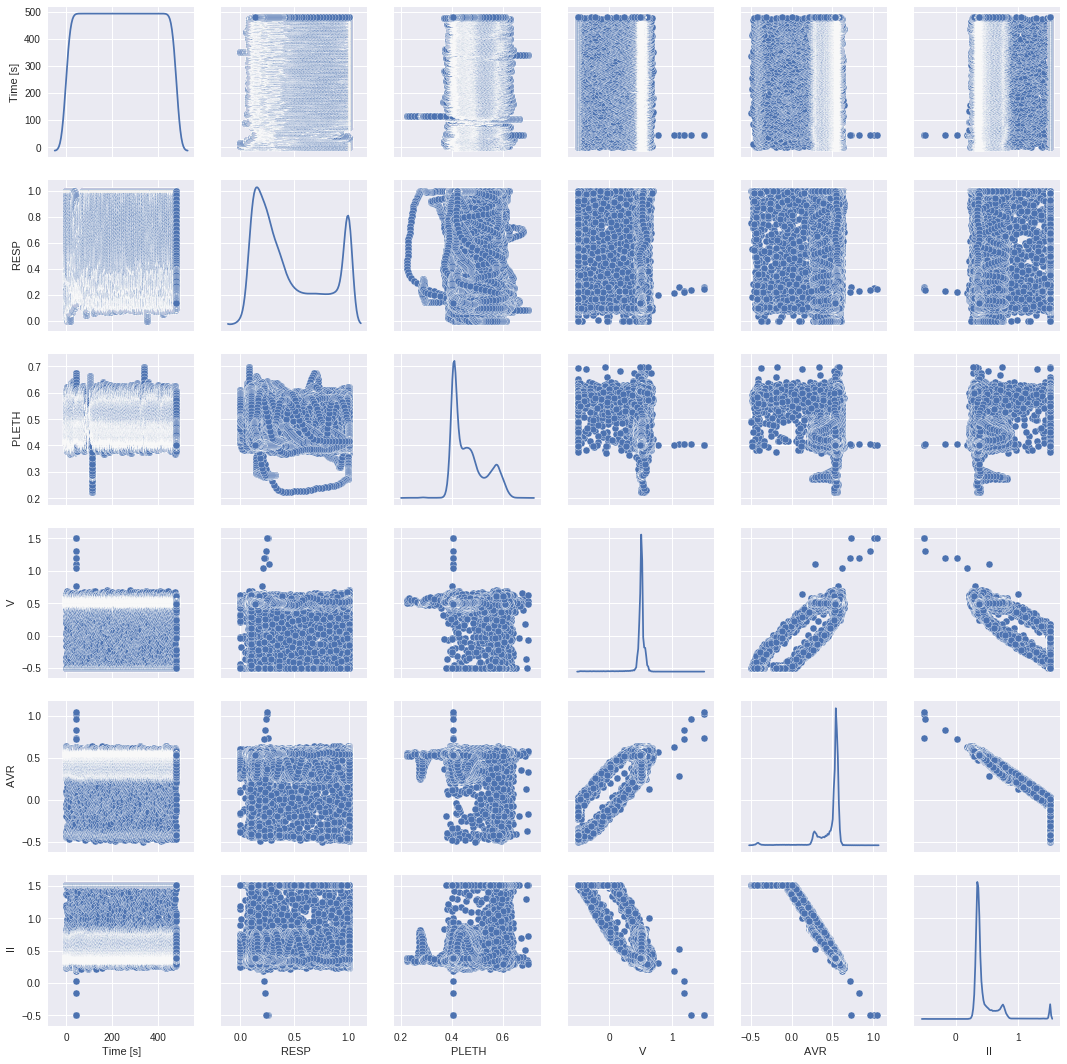

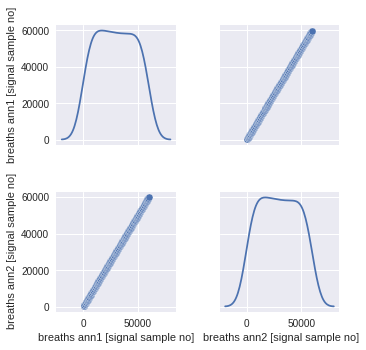

In [0]:
df = pd.read_csv(io.StringIO(uploaded['bidmc_01_Numerics.csv.txt'].decode('utf-8')))
df = df.dropna()
sns.pairplot(df, diag_kind="kde")

df2 = pd.read_csv(io.StringIO(uploaded['bidmc_01_Signals.csv.txt'].decode('utf-8')))
df2 = df2.dropna()
sns.pairplot(df2, diag_kind="kde")

df3 = pd.read_csv(io.StringIO(uploaded['bidmc_01_Breaths.csv.txt'].decode('utf-8')))
df3 = df3.dropna()
sns.pairplot(df3, diag_kind="kde")

In [0]:
from google.colab import files
uploaded = files.upload()

Saving bidmc_01_Numerics.csv to bidmc_01_Numerics.csv
Saving bidmc_02_Numerics.csv to bidmc_02_Numerics.csv
Saving bidmc_03_Numerics.csv to bidmc_03_Numerics.csv


In [0]:
numerics_df = pd.DataFrame()
for i in range(1,4):
  filestring = 'bidmc_0' + str(i) + '_Numerics.csv'
  patient_number = 'Patient' + '' + str(i)
  df = pd.read_csv(io.StringIO(uploaded[filestring].decode('utf-8')))
  df = df.dropna()
  df['Patient'] = patient_number
  numerics_df = numerics_df.append(df, ignore_index=True)

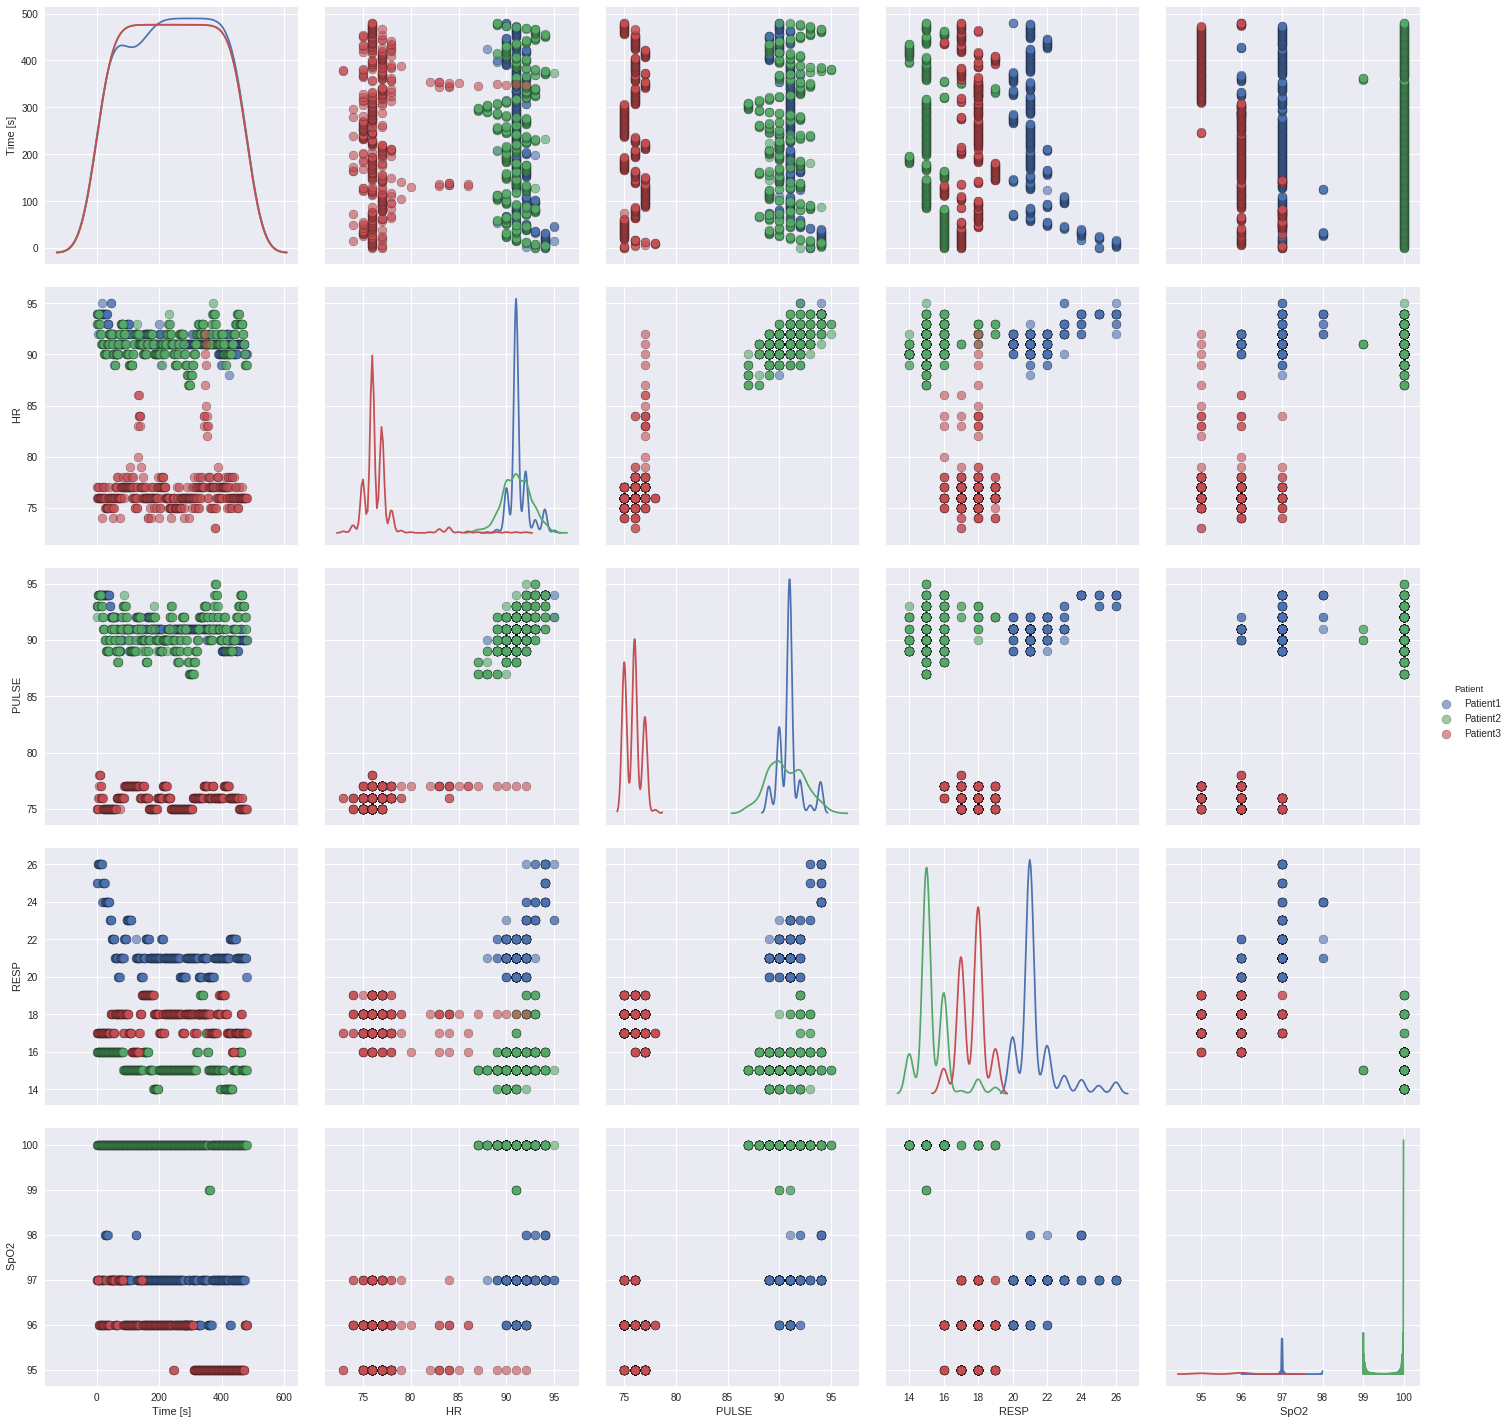

In [0]:
sns.pairplot(base_df, hue = 'Patient', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)            

The next step after a single pairplot to find trends would be to compare the same variables across several patients.
Above is a comparison between several patients. As you can see, some interesting things can be understood when the data is not in a vacuum and juxtaposed against other instances. For example we see that Patient 3's heartrate would actually be considered low when placed against patient 2s.

In [0]:
from google.colab import files
uploaded = files.upload()

Saving bidmc_01_Breaths.csv to bidmc_01_Breaths.csv
Saving bidmc_02_Breaths.csv to bidmc_02_Breaths.csv
Saving bidmc_03_Breaths.csv to bidmc_03_Breaths.csv


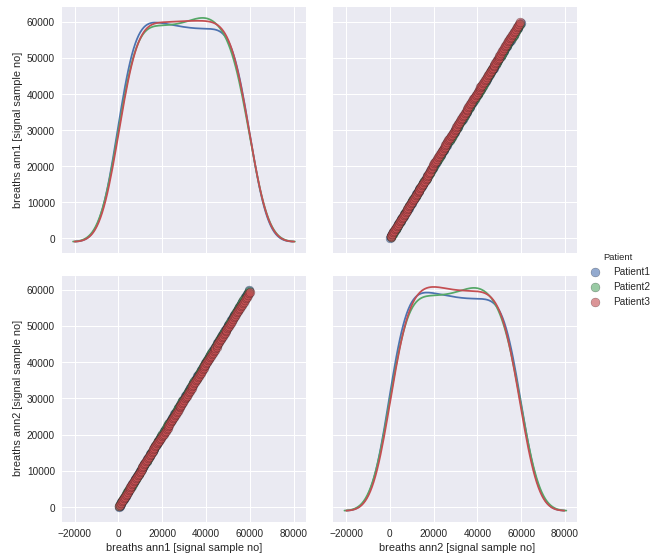

In [0]:
breaths_df = pd.DataFrame()
for i in range(1,4):
  filestring = 'bidmc_0' + str(i) + '_Breaths.csv'
  patient_number = 'Patient' + '' + str(i)
  df = pd.read_csv(io.StringIO(uploaded[filestring].decode('utf-8')))
  df = df.dropna()
  df['Patient'] = patient_number
  breaths_df = breaths_df.append(df, ignore_index=True)

  
sns.pairplot(breaths_df, hue = 'Patient', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

In [0]:
train_df = numerics_df.sample(frac=0.8,random_state=0) 
test_df = numerics_df.drop(train_df.index)

x_train = train_df.drop(['Patient'], axis=1)
y_train = train_df.pop('Patient')

x_test = test_df.drop(['Patient'], axis=1)
y_test = test_df.pop('Patient')

In [0]:
from sklearn import tree
from sklearn.metrics import accuracy_score
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
predicted_value = clf.predict(x_test)
true_value = y_test
accuracy_score(true_value, predicted_value)

1.0

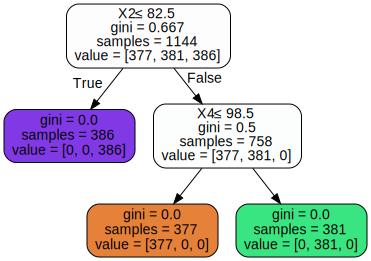

In [0]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Above is just a very simple ML model classifier. Based off our data, 80% is used to train and 20% used to predict. A decision tree now attempts to predict which patient an instance of data is based on the values of the features given. 
You'll see the accuracy is 1 (100%), this is only the case because of the low variability and small sample size.